In [52]:
import pandas as pd

In [53]:
df = pd.read_csv('penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [55]:
print(df.shape)

(344, 7)


In [56]:
df.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [57]:
df.corr()

C:\Users\necme\AppData\Local\Temp\ipykernel_3492\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\necme\AppData\Local\Temp\ipykernel_3492\1368533763.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='coolwarm')


<AxesSubplot: >

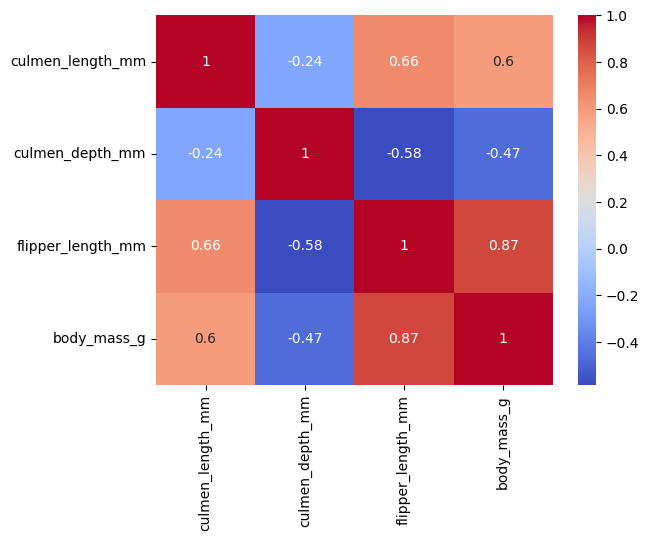

In [59]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [60]:
nan_percentage = df.isna().sum() / df.count()*100
nan_count = df.isna().sum()

nan_table = pd.concat([nan_count,nan_percentage],axis=1)
nan_table.columns = ['Count','Percantage']
nan_table

,Count,Percantage
species,0,0.000000
island,0,0.000000
culmen_length_mm,2,0.584795
culmen_depth_mm,2,0.584795
flipper_length_mm,2,0.584795
body_mass_g,2,0.584795
sex,10,2.994012


In [61]:
from sklearn.impute import SimpleImputer

In [62]:
imputer = SimpleImputer(strategy='most_frequent')

In [63]:
df.iloc[:,:] = imputer.fit_transform(df)

In [64]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [65]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,MALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['sex'])

In [68]:
df['sex'].value_counts()

MALE      178
FEMALE    165
.           1
Name: sex, dtype: int64

In [69]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,gender
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,1
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,MALE,2
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,1


In [70]:
df[df['gender']==0].index
new_df = df.drop(df[df['gender']==0].index,axis=0)
new_df['sex'].value_counts()


MALE      178
FEMALE    165
Name: sex, dtype: int64

In [71]:
df.drop(labels=['sex'],axis=1,inplace=True)
#or 
#df = df.drop(labels=['sex'],axis=1)

In [72]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,gender
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,1
3,Adelie,Torgersen,41.1,17.0,190.0,3800.0,2
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,1


In [81]:
species_count = df['species'].value_counts().reset_index()

<AxesSubplot: xlabel='index', ylabel='species'>

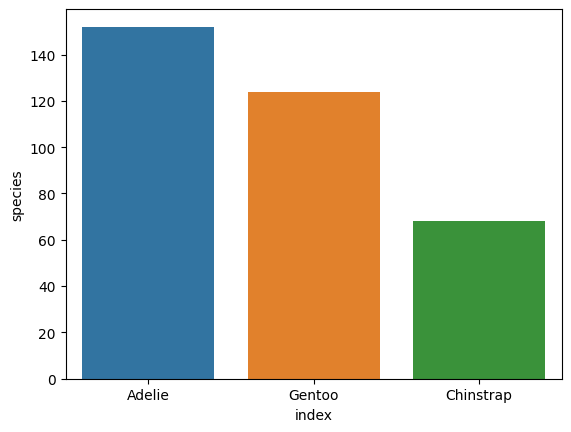

In [82]:
sns.barplot(data = species_count,x='index',y='species')